# Tarea 1: Simulación e Integración via Monte Carlo

- Martínez Ostoa Néstor I. 
- Computación Estadística
- IIMAS, UNAM

In [499]:
from random import seed
import numpy as np
from scipy.integrate import quad
from scipy.stats import expon
import matplotlib.pyplot as plt
import math

## Variables antitéticas con método de la transformación inversa

*Para cada $n\in \{2,3,\ldots,100\}$ implemente $1000$ experimentos Monte-Carlo, basados en $n$ simulaciones cada uno, tanto para el método crudo y antitético con método de la transformación inversa estimando $\mathbb{E}_f[h(X)]$ con la función de densidad de probabilidad $f$ y la función $h$ de su elección.*

---

- $f \sim Exp(1)$
- $h(x) = x^2$

--- 

**Solución:**
1. Generar $1000$ muestras de tamaño $n$ con distribución $f$ mediante el método de la transformación inversa
2. Obtener $\hat{h}_{crudo}$
3. Obtener $\hat{h}_{antitetica}$

In [95]:
seed(23)

In [96]:
def inverse_transform_sampling(n, lambda_=1):
    return expon.ppf(np.random.uniform(0, 1, n), lambda_) - 1

def plot_sample(sample):
    counts, bins, ignored = plt.hist(sample, bins=50, density = True)
    plt.title("Función de densidad exponencial simulada con transformación inversa")
    plt.show()

In [97]:
sample = inverse_transform_sampling(n = 10000,lambda_ = 1)

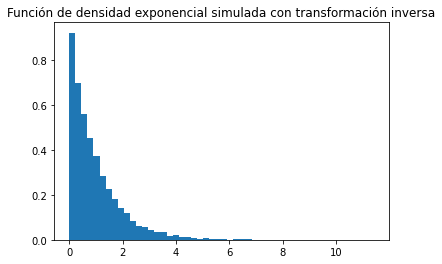

In [98]:
plot_sample(sample)

In [147]:
def plot_variances(var_raw, var_ant):
    x = list(range(2, 101))
    plt.plot(x, var_raw, color='black', label='Monte-Carlo crudo')
    plt.plot(x, var_ant, color='blue', label='Monte-Carlo variables antitéticas')
    plt.xlabel(r'$n$')
    plt.ylabel(r'Varianza empírica')
    plt.title(r"Varianza empírica para $\hat{\mu}_n$ con 1000 experimentos Monte-Carlo" "\n" "y la función $h(x)=x^2$")
    plt.legend()
    plt.show()

In [169]:
h = lambda x: x**2

In [150]:
def get_means_variances(n, m, h):
    means_raw_mc = []
    variances_raw_mc = []
    means_antithetic = []
    variances_antithetic = []
    for i in range(m):
        sample = inverse_transform_sampling(n)
        #sample = np.random.uniform(0, 1, n)
        
        # Raw Monte Carlo
        mu = np.mean(h(sample))
        means_raw_mc.append(mu)
        var = np.sum((h(sample) - mu)**2) / (n-1)
        variances_raw_mc.append(var)
        
        # Antithetic
        mu_ant = np.mean((h(sample) + h(1-sample))/2)
        means_antithetic.append(mu_ant)
        var_ant = (1/4)*(np.var(h(sample)) + np.var(h(1-sample)) + 2*np.cov(h(sample), h(1-sample)))
        variances_antithetic.append(var_ant)
        
    return np.mean(means_raw_mc), np.mean(variances_raw_mc), np.mean(means_antithetic), np.mean(variances_antithetic)

In [158]:
def simulate(h, m=1000):
    variances_raw_mc = []
    means_raw_mc = []    
    variances_antithetic = []
    means_antithetic = []    
    for n in range(2, 101):
        mean_raw_mc, var_raw_mc, mean_ant, var_ant = get_means_variances(n, m, h)
        means_raw_mc.append(mean_raw_mc)
        variances_raw_mc.append(var_raw_mc)
        means_antithetic.append(mean_ant)
        variances_antithetic.append(var_ant)
    return means_raw_mc[-1], variances_raw_mc, means_antithetic[-1], variances_antithetic

In [159]:
mean_mc, raw_mc_variances, mean_ant, antithetic_variances = simulate(h, m=1000)

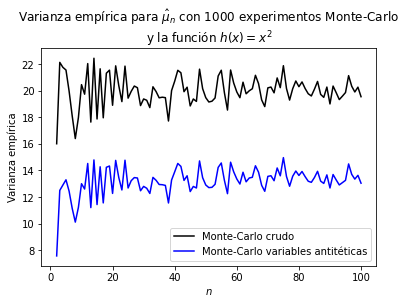

In [160]:
plot_variances(raw_mc_variances, antithetic_variances)

## Monte-Carlo Estratificado

*Elija una función $h: [0,1] \rightarrow \mathbb{R}$ y estime $\int_{}^{}h(x)dx$ mediante 100 experimentos de Monte-Carlo crudo y estratificados de alocación proporcional con número de estratos $S\in \{2,4,8,16\}$ (100 experimentos para cada tipo de Monte-Carlo). Finalmente, estime la varianza del estimador para cada tipo de metodología Monte-Carlo considerada y compare*

---



In [380]:
def plot_variances(variances, N=100):
    x = list(range(1,101))
    for key in variances.keys():
        plt.plot(x, variances[key], label=f"{key}")

    plt.title(r"Varianza estimada Monte-Carlo crudo v. Monte-Carlo estratificado" "\n" "para $h=e^{x^2}$")
    plt.xlabel("Número de experimentos")
    plt.ylabel("Varianza")
    plt.legend()
    plt.show()    

In [361]:
h2 = lambda x: np.exp(x**2)

In [389]:
real_value = quad(h2, 0, 1)[0]
print(f"Valor real de la integral: {np.round(real_value, 4)}")

Valor real de la integral: 1.4627


In [363]:
def monte_carlo(H, sample):
    return np.mean(H(sample))

def var_monte_carlo(H, mu, sample):
    n = sample.shape[0]
    return np.sum((H(sample) - mu)**2) / (n-1)

In [364]:
mc = []
for i in range(1000):
    mc.append(monte_carlo(H=h2, sample=np.random.uniform(0,1,1000)))
print(f"Valor estimado con Monte-Carlo crudo: {np.mean(mc)}")

Valor estimado con Monte-Carlo crudo: 1.4626013853940656


In [383]:
def stratified_monte_carlo(H, S, size_per_sample):
    variances = []
    means = []
    for s in range(1, S+1):
        a = (s-1)/S
        b = s/S
        sample = np.random.uniform(a, b, size_per_sample)
        mu = monte_carlo(H, sample)
        var = var_monte_carlo(H, mu, sample)
        means.append(mu)
        variances.append(var)
    return np.mean(means), np.mean(variances)

In [384]:
variances = {
    'Monte-Carlo crudo':[],
    'S=2': [], 'S=4': [],
    'S=8': [], 'S=16': [],
}
means = {
    'Monte-Carlo crudo':[],
    'S=2': [], 'S=4': [],
    'S=8': [], 'S=16': [],
}
for i in range(100):
    sample = np.random.uniform(0, 1, 1000)
    mu = monte_carlo(h2, sample)
    var = var_monte_carlo(h2, mu, sample)
    variances['Monte-Carlo crudo'].append(var)
    means['Monte-Carlo crudo'].append(mu)
    
    for s in [2,4,8,16]:
        key = "S=" + str(s)
        mu_s, var_s = stratified_monte_carlo(h2, s, 1000)
        variances[key].append(var_s)
        means[key].append(mu_s)

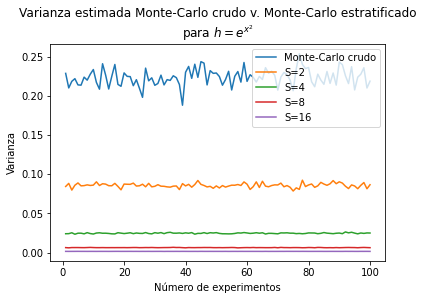

In [385]:
plot_variances(variances)

In [390]:
for key in means.keys():
    print(f"{key} : {np.round(np.mean(means[key]),4)}")

Monte-Carlo crudo : 1.4602
S=2 : 1.4614
S=4 : 1.4623
S=8 : 1.4627
S=16 : 1.4626


## Muestreo por importancia

*Sea $\Sigma$ una matriz de varianza-covarianza dada por $$\Sigma^{-1/2} = \text{diag}(0,1,2,3,4,5) + vv'$$ con $v=(1,1,1,1,1,1)$. Sea $Z \sim \text{NormalMultiv}_6(0,\Sigma)$. Estime $\mathbb{P}[Z \in (0,\infty)^6]$ mediante*: 

*1) Monte-Carlo crudo simulando $Z_i = \Sigma^{-1/2}W_i$ con $W_i \sim \text{NormalMultiv}_6(\pm, I_6)$*
 

---

In [513]:
import random
random.seed(23)

In [514]:
D = np.diag([0,1,2,3,4,5])
v = np.ones(6)
sigma_ = D + v*v.T
sigma_

array([[1., 1., 1., 1., 1., 1.],
       [1., 2., 1., 1., 1., 1.],
       [1., 1., 3., 1., 1., 1.],
       [1., 1., 1., 4., 1., 1.],
       [1., 1., 1., 1., 5., 1.],
       [1., 1., 1., 1., 1., 6.]])

In [515]:
def Z(Wi, sigma):
    return sigma @ Wi

In [541]:
N = 100000
means = []
for i in range(N):
    Wi = np.random.multivariate_normal(np.zeros(6), np.eye(6))
    Zi = Z(Wi, sigma_)
    M = np.mean(Zi[Zi > 0])
    if not math.isnan(M): means.append(M / N)
np.mean(means)

2.978440542125311e-05

In [542]:
print("{:e}".format(np.mean(means)))

2.978441e-05


*2) Monte-Carlo crudo utilizando la factorización de Choleski de $\Sigma$*

In [544]:
sigma = np.linalg.matrix_power(np.linalg.inv(sigma_), 2)
print(sigma)

[[12.24388889 -4.28333333 -1.89166667 -1.20555556 -0.88333333 -0.69666667]
 [-4.28333333  2.          0.5         0.33333333  0.25        0.2       ]
 [-1.89166667  0.5         0.5         0.16666667  0.125       0.1       ]
 [-1.20555556  0.33333333  0.16666667  0.22222222  0.08333333  0.06666667]
 [-0.88333333  0.25        0.125       0.08333333  0.125       0.05      ]
 [-0.69666667  0.2         0.1         0.06666667  0.05        0.08      ]]


In [547]:
L = np.linalg.cholesky(sigma)
print(L)

[[ 3.49912688  0.          0.          0.          0.          0.        ]
 [-1.2241149   0.70819681  0.          0.          0.          0.        ]
 [-0.54061105 -0.22842527  0.39441296  0.          0.          0.        ]
 [-0.34453039 -0.12484023 -0.12197098  0.27029434  0.          0.        ]
 [-0.25244393 -0.08333894 -0.07735724 -0.08687072  0.20198025  0.        ]
 [-0.19909729 -0.06173136 -0.05510771 -0.06051366 -0.07389521  0.15617376]]


In [548]:
means = []
for i in range(N):
    Wi = np.random.multivariate_normal(np.zeros(6), np.eye(6))
    Zi = Z(Wi, L)
    M = np.mean(Zi[Zi > 0])
    if not math.isnan(M): means.append(M / N)
np.mean(means)

1.4016494706053504e-05

In [549]:
print("{:e}".format(np.mean(means)))

1.401649e-05
